In [7]:
import numpy as np    #to perform numerical operations
import pandas as pd   #for reading csv files
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
#sklearn: scikit learn has many classification,regression, clustering algorithms in machine learning,statistical modeling


In [8]:
#Training data Preprocessing
df=pd.read_csv("C:\\HealthScanner\\Datasets\\TrainTest.csv")  #pandas object to read csv file
df

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30-04-2020,0,0,0,0,0,negative,None,female,Other
1,30-04-2020,1,0,0,0,0,negative,None,female,Other
2,30-04-2020,0,1,0,0,0,negative,None,male,Other
3,30-04-2020,1,0,0,0,0,negative,None,female,Other
4,30-04-2020,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,11-03-2020,0,0,0,0,0,negative,None,None,Other
278844,11-03-2020,0,0,0,0,0,negative,None,None,Other
278845,11-03-2020,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,11-03-2020,0,0,0,0,0,other,None,None,Other


In [9]:
df.head(20)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30-04-2020,0,0,0,0,0,negative,None,female,Other
1,30-04-2020,1,0,0,0,0,negative,None,female,Other
2,30-04-2020,0,1,0,0,0,negative,None,male,Other
3,30-04-2020,1,0,0,0,0,negative,None,female,Other
4,30-04-2020,1,0,0,0,0,negative,None,male,Other
5,30-04-2020,1,0,0,0,0,negative,None,female,Other
6,30-04-2020,1,1,0,0,0,negative,None,male,Abroad
7,30-04-2020,0,0,0,0,0,negative,None,female,Other
8,30-04-2020,0,0,0,0,0,negative,None,male,Other
9,30-04-2020,0,0,0,0,0,negative,None,male,Contact with confirmed


In [10]:
df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [13]:
np.shape(df)

(278848, 10)

In [14]:
df=df.replace(to_replace="No", value=0.0)
df=df.replace(to_replace="Yes", value=1.0)

df=df.replace(to_replace=0, value=0.0)
df=df.replace(to_replace=1, value=1.0)

In [15]:
df=df.replace(to_replace="male", value=0.0)
df=df.replace(to_replace="female",value=1.0)

In [16]:
df=df.replace(to_replace="Other", value=1.0)
df=df.replace(to_replace="Abroad", value=2.0)
df=df.replace(to_replace="Contact with confirmed",value=3.0)

In [17]:
df=df.replace(to_replace="other", value=2.0)
df=df.replace(to_replace="positive", value=1.0)
df=df.replace(to_replace="negative", value=0.0)
df=df.replace(to_replace="None",value=3.0)

df = df.drop(columns="test_date")

In [18]:
df.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
6,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0


In [19]:
df = df.apply(pd.to_numeric)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


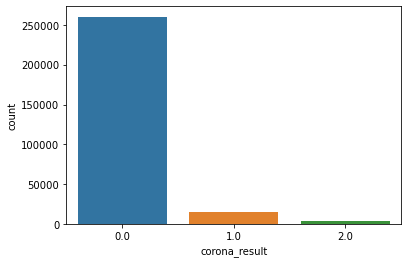

In [20]:
sn.countplot(df["corona_result"])
plt.show()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
cough,1.000000,0.491798,0.114030,0.105270,0.114447,0.137794,-0.081414,-0.029915,0.473015
fever,0.491798,1.000000,0.118408,0.121777,0.162965,0.182682,-0.056135,-0.019327,0.317104
sore_throat,0.114030,0.118408,1.000000,0.201666,0.325944,0.194823,-0.053651,0.040061,0.167708
shortness_of_breath,0.105270,0.121777,0.201666,1.000000,0.206187,0.163456,-0.037732,0.052770,0.132524
head_ache,0.114447,0.162965,0.325944,0.206187,1.000000,0.254488,-0.078373,0.012713,0.199504
corona_result,0.137794,0.182682,0.194823,0.163456,0.254488,1.000000,-0.079705,0.009027,0.342085
age_60_and_above,-0.081414,-0.056135,-0.053651,-0.037732,-0.078373,-0.079705,1.000000,-0.044678,-0.104422
gender,-0.029915,-0.019327,0.040061,0.052770,0.012713,0.009027,-0.044678,1.000000,-0.006373
test_indication,0.473015,0.317104,0.167708,0.132524,0.199504,0.342085,-0.104422,-0.006373,1.000000


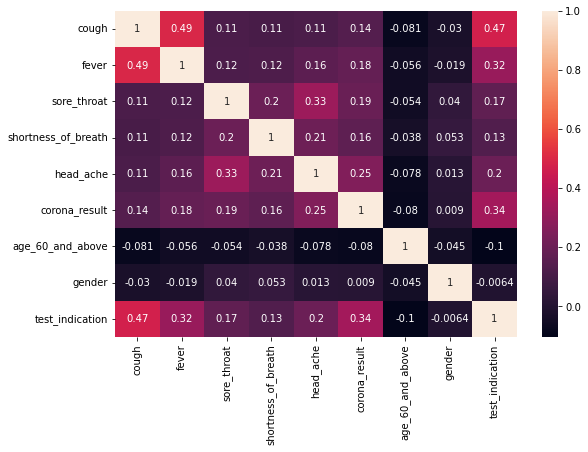

In [21]:
plt.figure(figsize=(9,6))
c=df.corr()
sn.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)
c

In [22]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [23]:
X=df[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 
      'age_60_and_above', 'gender', 'test_indication']]

In [24]:
y=df['corona_result']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
#Testing Data Preprocessing

gf = pd.read_csv("C:\\HealthScanner\\Datasets\\Testing.csv")
gf

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1,1,1,0,1,positive,0,female,Contact with confirmed
1,0,0,0,0,0,negative,0,female,Other
2,0,0,0,0,0,negative,0,male,Other
3,0,0,0,0,0,negative,0,male,Other
4,1,1,1,0,1,negative,0,female,Other
...,...,...,...,...,...,...,...,...,...
144,0,1,0,0,0,negative,0,female,Other
145,1,1,1,1,0,positive,0,female,Other
146,0,1,1,1,0,negative,0,female,Other
147,1,0,1,0,0,negative,0,female,Other


In [27]:
gf.head(20)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1,1,1,0,1,positive,0,female,Contact with confirmed
1,0,0,0,0,0,negative,0,female,Other
2,0,0,0,0,0,negative,0,male,Other
3,0,0,0,0,0,negative,0,male,Other
4,1,1,1,0,1,negative,0,female,Other
5,0,0,0,0,0,negative,0,male,Other
6,0,0,0,0,0,negative,0,female,Other
7,1,1,0,0,0,positive,0,female,Contact with confirmed
8,0,0,0,0,0,negative,0,female,Contact with confirmed
9,0,0,0,0,0,negative,0,male,Other


In [28]:
gf.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [29]:
gf=gf.dropna()

In [30]:
np.shape(gf)

(149, 9)

In [31]:
gf=gf.replace(to_replace="No", value=0.0)
gf=gf.replace(to_replace="Yes", value=1.0)

gf=gf.replace(to_replace="0", value=0.0)
gf=gf.replace(to_replace="1", value=1.0)

In [32]:
gf=gf.replace(to_replace="male", value=0.0)
gf=gf.replace(to_replace="female",value=1.0)

In [33]:
gf=gf.replace(to_replace="Other", value=1.0)
gf=gf.replace(to_replace="Abroad", value=2.0)
gf=gf.replace(to_replace="Contact with confirmed",value=3.0)

In [34]:
gf=gf.replace(to_replace="other", value=2.0)
gf=gf.replace(to_replace="positive", value=1.0)
gf=gf.replace(to_replace="negative", value=0.0)
gf=gf.replace(to_replace="None",value=3.0)

In [35]:
gf.head(20)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1,1,1,0,1,1.0,0,1.0,3.0
1,0,0,0,0,0,0.0,0,1.0,1.0
2,0,0,0,0,0,0.0,0,0.0,1.0
3,0,0,0,0,0,0.0,0,0.0,1.0
4,1,1,1,0,1,0.0,0,1.0,1.0
5,0,0,0,0,0,0.0,0,0.0,1.0
6,0,0,0,0,0,0.0,0,1.0,1.0
7,1,1,0,0,0,1.0,0,1.0,3.0
8,0,0,0,0,0,0.0,0,1.0,3.0
9,0,0,0,0,0,0.0,0,0.0,1.0


In [36]:
gf.dtypes

cough                    int64
fever                    int64
sore_throat              int64
shortness_of_breath      int64
head_ache                int64
corona_result          float64
age_60_and_above         int64
gender                 float64
test_indication        float64
dtype: object

In [37]:
#LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.949965572641726

In [41]:
#Testing for Indian Data

tX=gf[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 
      'age_60_and_above', 'gender', 'test_indication']]
ty=gf['corona_result']

In [42]:
yt_test = model.predict(tX)

In [43]:
accuracy_score(ty,yt_test)  #Accuracy on Indian data

0.7583892617449665

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[64650,   398,     0],
       [ 2089,  1574,     0],
       [  962,    39,     0]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     65048
         1.0       0.78      0.43      0.55      3663
         2.0       0.00      0.00      0.00      1001

    accuracy                           0.95     69712
   macro avg       0.58      0.47      0.51     69712
weighted avg       0.93      0.95      0.94     69712



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [48]:
y_pred_knn=knn.predict(X_test)

In [49]:

accuracy_score(y_test,y_pred_knn)

0.948488065182465

In [50]:
#Testing for Indian Data
yt_test = knn.predict(tX)

accuracy_score(ty,yt_test)  #Accuracy on Indian data

0.7449664429530202

In [51]:
confusion_matrix(y_test,y_pred_knn)

array([[64709,   339,     0],
       [ 2251,  1412,     0],
       [  972,    29,     0]], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     65048
         1.0       0.79      0.39      0.52      3663
         2.0       0.00      0.00      0.00      1001

    accuracy                           0.95     69712
   macro avg       0.58      0.46      0.50     69712
weighted avg       0.93      0.95      0.94     69712



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
#Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

In [55]:

clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [56]:

pred_gb=clf.predict(X_test)

In [57]:
accuracy_score(y_test,pred_gb)

0.955502639430801

In [58]:
#Testing for Indian Data
yt_test = clf.predict(tX)

accuracy_score(ty,yt_test)  #Accuracy on Indian data

0.7248322147651006

In [59]:
import pickle

In [60]:
confusion_matrix(y_test,pred_gb) 

array([[64528,   520,     0],
       [ 1581,  2082,     0],
       [  954,    47,     0]], dtype=int64)

In [61]:
pickle.dump(clf,open('model.pkl','wb'))

In [62]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     65048
         1.0       0.79      0.57      0.66      3663
         2.0       0.00      0.00      0.00      1001

    accuracy                           0.96     69712
   macro avg       0.58      0.52      0.55     69712
weighted avg       0.94      0.96      0.95     69712



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#RandomForest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=2)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2)

In [66]:

pred_rfc=rfc.predict(X_test)

In [67]:
#Testing for Indian Data
yt_test = rfc.predict(tX)

accuracy_score(ty,yt_test)  #Accuracy on Indian data

0.7516778523489933

In [68]:
accuracy_score(y_test,pred_rfc)

0.9398238466834978

In [69]:
confusion_matrix(y_test,pred_rfc)

array([[65015,    33,     0],
       [ 3161,   502,     0],
       [  990,    11,     0]], dtype=int64)

In [70]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     65048
         1.0       0.92      0.14      0.24      3663
         2.0       0.00      0.00      0.00      1001

    accuracy                           0.94     69712
   macro avg       0.62      0.38      0.40     69712
weighted avg       0.93      0.94      0.92     69712



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#NAIVE BAYES

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [73]:
y_pred = gnb.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.9421907275648382

In [75]:
#Testing for Indian Data
yt_test = gnb.predict(tX)

accuracy_score(ty,yt_test)  #Accuracy on Indian data

0.7248322147651006

In [76]:
confusion_matrix(y_test,y_pred)

array([[63335,  1700,    13],
       [ 1306,  2347,    10],
       [  933,    68,     0]], dtype=int64)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     65048
         1.0       0.57      0.64      0.60      3663
         2.0       0.00      0.00      0.00      1001

    accuracy                           0.94     69712
   macro avg       0.51      0.54      0.52     69712
weighted avg       0.93      0.94      0.94     69712



In [78]:
#SVM

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
from sklearn import svm

In [81]:
scaler=StandardScaler()

In [82]:
scaler.fit(X_train)

StandardScaler()

In [83]:
standardized_data=scaler.transform(X_train)

In [84]:
print(standardized_data)

[[-0.4195824  -0.2874168  -0.08341134 ... -1.01849664 -0.84756259
  -0.36156564]
 [ 2.28573838 -0.2874168  -0.08341134 ... -1.01849664  0.4042531
  -0.36156564]
 [ 2.28573838 -0.2874168  -0.08341134 ...  1.07004713  0.4042531
   1.78815412]
 ...
 [-0.4195824  -0.2874168  -0.08341134 ... -0.32231538  0.4042531
  -0.36156564]
 [ 2.28573838 -0.2874168  -0.08341134 ...  1.07004713  0.4042531
  -0.36156564]
 [-0.4195824  -0.2874168  -0.08341134 ...  1.07004713  0.4042531
  -0.36156564]]


In [85]:
classifier= svm.SVC(kernel='linear')

In [86]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [87]:
_prediction=classifier.predict(X_train)

In [88]:
training_data_accuracy=accuracy_score(_prediction,y_train)

In [89]:
print( training_data_accuracy)

0.9443950348098845


In [90]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)

In [91]:
print( test_data_accuracy)

0.9439838191416112


In [92]:
#Testing for Indian Data
yt_test = classifier.predict(tX)

accuracy_score(ty,yt_test)  #Accuracy on Indian data

0.738255033557047

In [93]:
confusion_matrix(y_test,X_test_prediction)

array([[64885,   163,     0],
       [ 2741,   922,     0],
       [  981,    20,     0]], dtype=int64)